Eulers metode sammenliknet med 4.ordens Runge-Kutta

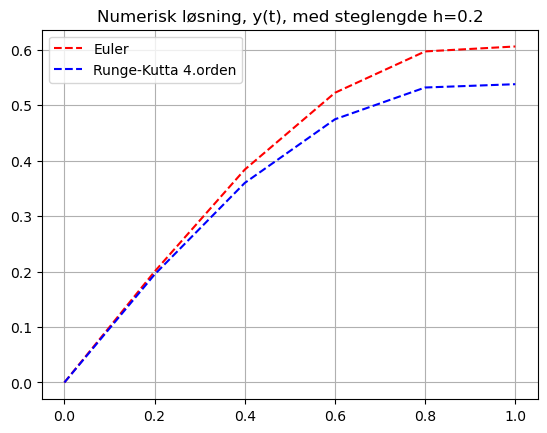

   x-verdi  y [Euler]  y [RK4]
0      0.0     0.0000   0.0000
1      0.2     0.2000   0.1947
2      0.4     0.3840   0.3599
3      0.6     0.5226   0.4747
4      0.8     0.5971   0.5321
5      1.0     0.6061   0.5380


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def F(x,y):
    dydx =  1 - 2*x*y      # Definerer diff.likningen som y' = F(x,y)
    return dydx

a, b = 0, 1        # Intervallet for x
n = 5             # Antall iterasjoner
h = (b - a)/n      # Steglengden

xn = np.linspace(a, b, n+1)   
ynE = np.zeros(n+1)    # Mhp. Eulers metode       
ynRK = np.zeros(n+1)   # Mhp. Runge-Kutta
D1, D2, D3, D4 = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)



y0 = 0          # Initialverdi
ynE[0] = y0     # Setter første element i y-vektoren lik y0
ynRK[0] = y0

for i in range(0,n):
    # Algoritme for Euler:
    ynE[i+1] = ynE[i] + h * F(xn[i] , ynE[i])    
    
    # Algoritme for 4.ordens Runge-Kutta: 
    D1[i] = h * F(xn[i] , ynRK[i])
    D2[i] = h * F(xn[i] + h/2 , ynRK[i] + D1[i]/2)
    D3[i] = h * F(xn[i] + h/2 , ynRK[i] + D2[i]/2)
    D4[i] = h * F(xn[i] + h , ynRK[i] + D3[i])
    ynRK[i+1] = ynRK[i] + 1/6 * (D1[i] + 2*D2[i] + 2*D3[i] + D4[i]) 

    
plt.close('all')
plt.plot(xn , ynE , 'r--', label ='Euler')  # Plot av Euler-tilnærmingen
plt.plot(xn , ynRK , 'b--', label ='Runge-Kutta 4.orden')   # Plot av RK4-tilnærmingen
plt.title(f'Numerisk løsning, y(t), med steglengde h={h}')
plt.grid()
plt.legend()
plt.show()

tabell = np.transpose(np.array([xn, ynE, ynRK]))

import pandas as pd
df = pd.DataFrame(np.round(tabell,4), columns = ['x-verdi','y [Euler]','y [RK4]'])
print(df)
